### Using `np.histogram()`

Although pandas provides the convenient `.histogram()` method, this is not the most flexible way to generate a plot. We can also compute histograms using `np.histogram()`, without immediately plotting them — just the way we did with the `ten_intensities` data. We save these histograms in memory, which allows more flexibility in how we later plot them. To do this, we have to loop over orientations and conditions, compute the histogram for each, and save these to plot later. 

Below we demonstrate two ways to do this, one using a dictionary to hold the results, and the other using list comprehension. They are equally fast, and either one is valid. However, an advantage of the dictionary approach is that we use keys to the dictionary that clearly indicate what combination of orientation and sort code each histogram is associated with. In contrast, when using list comprehension we have to generate a separate list of labels in parallel with the list containing the histograms (data) themselves. This is a bit less transparent — since unlike a dictionary, the labels aren't stored with the data. The list approach thus requires attention to detail to ensure that the list of labels is in the same order as the list of histograms. This also makes it more fragile and error-prone.

### The dictionary way

We generate a dictionary key for each combination of `sort` and `orientation`, and assign the histogram for each combination as the value for that key.

In [14]:
psth_dict = {}

for ortn in orientations:
    for sort in sort_codes:
        label = str(ortn) + '_' + str(sort)
        psth_dict[label] = np.histogram(df[(df['orientation']==ortn) & 
                                           (df['sort']==sort)]['time'],
                                        bins=time_base
                                       )

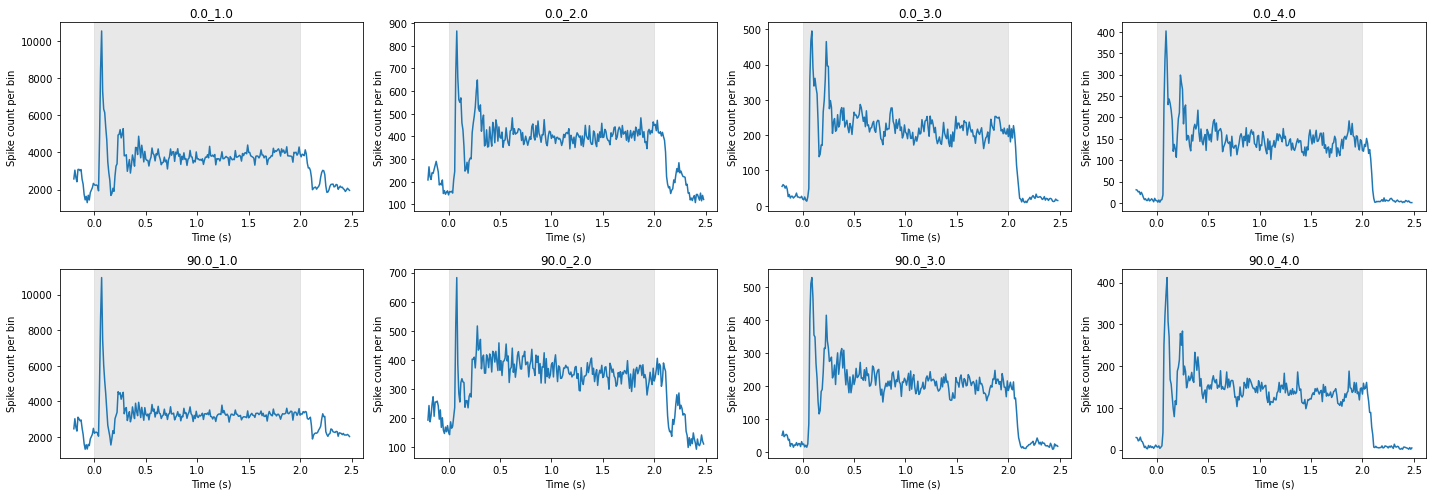

In [15]:
fig = plt.figure(figsize=[20,7])

# Loop through the keys of the PSTH dictionary
for i, label in enumerate(psth_dict.keys()):
    # set sublot based on number of orientations (rows) and number
    # of sort_codes (columns)
    ax = fig.add_subplot(num_ortns, len(sort_codes), i+1)
    
    # plot the histogram
    ax.plot(psth_dict[label][1][:-1], psth_dict[label][0])
    
    # Show when stimulus was on
    plt.axvspan(grating_on_time, grating_off_time, alpha=0.5, color='lightgray')

    ax.set_title(label)
    ax.set_ylabel('Spike count per bin')
    ax.set_xlabel('Time (s)')
    plt.tight_layout() # helps ensure titles and label text don't overlap
    
plt.show()    

Note above the differences in total spike counts (*y* axis) between sort codes. This is beacuse every channel as at least a sort code of 1 (one neuron/unit), but fewer channels were found to contain data from 2 or more units. So decreasing amounts of data contribute to the averages for sort codes 1-4.

### The list comprehension way

Here we use nested list comprehension to create a list of the histograms. 

In [16]:
psth_list = [np.histogram(df[(df['sort']==sort) & (df['orientation']==ortn)]['time'],
                          bins=time_base,
                         ) 
        for ortn in orientations
        for sort in sort_codes]

The histograms aren't labeled, so we need to make a second list containing the labels, using the same list comprehension (in the same order!) as we used above to create the list of histograms:

In [17]:
psth_list_labels = [[ortn, sort] for ortn in orientations for sort in sort_codes]

Now we plot them, using essentially the same code as for the dictionary version. There are two differences: in how we loop through the histograms, and what we give `ax.plot()` as input.

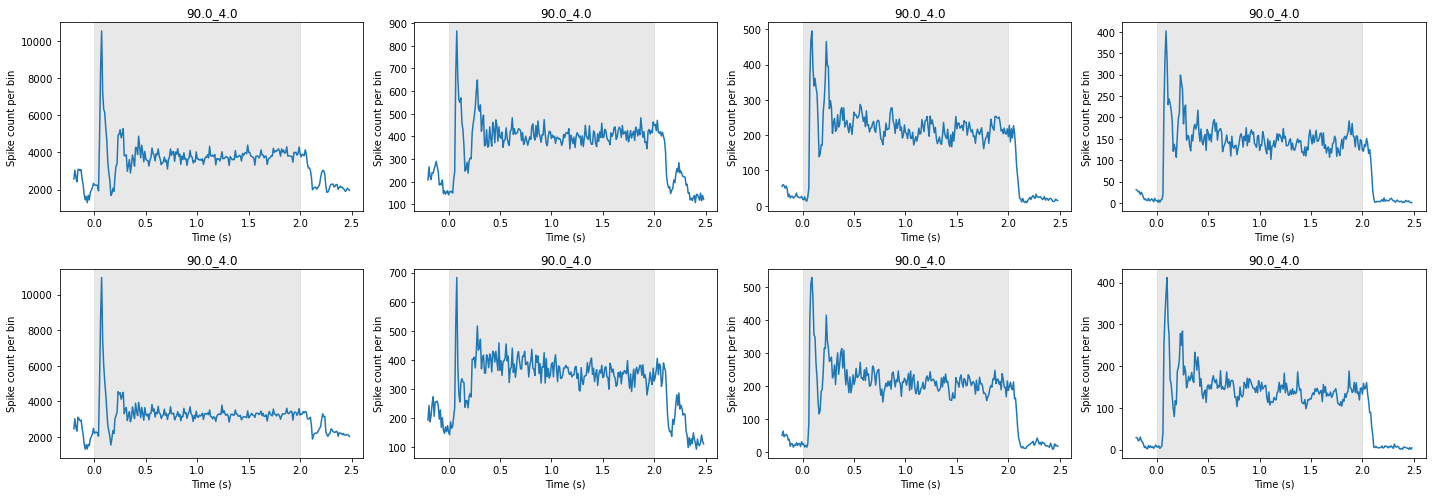

In [18]:
fig = plt.figure(figsize=[20,7])

for i in range(len(psth_list)):

    # set sublot based on number of orientations (rows) and number
    # of sort_codes (columns)
    ax = fig.add_subplot(num_ortns, len(sort_codes), i+1)

    # plot the histogram 
    ax.plot(psth_list[i][1][:-1], psth_list[i][0])

    # Show when stimulus was on
    plt.axvspan(grating_on_time, grating_off_time, alpha=0.5, color='lightgray')

    ax.set_title(label)
    ax.set_ylabel('Spike count per bin')
    ax.set_xlabel('Time (s)')
    plt.tight_layout() # helps ensure titles and label text don't overlap
    

    
plt.show()    

# The List Way

In [22]:
psth = [np.histogram(df[(df['orientation']==ortn) & (df['channel']==chan)]['time'],
                     bins=time_base
                    )
        for ortn in orientations
        for chan in channels]

# Generate the labels so we know what's what in the list above.
# Be sure to do the nested for loops in the same order (orientation then sort_code)
psth_labels = [[ortn, chan] for ortn in orientations for chan in channels]

To plot these, we use similar code to above. However, because there are 96 channels, we want to remove some axis labels from most plots (so it's less messy and less redundant). There's no way to make this not a huge image, since there are 96 panels to show, but by setting it to 4 columns we attain a good balance between readability and size.

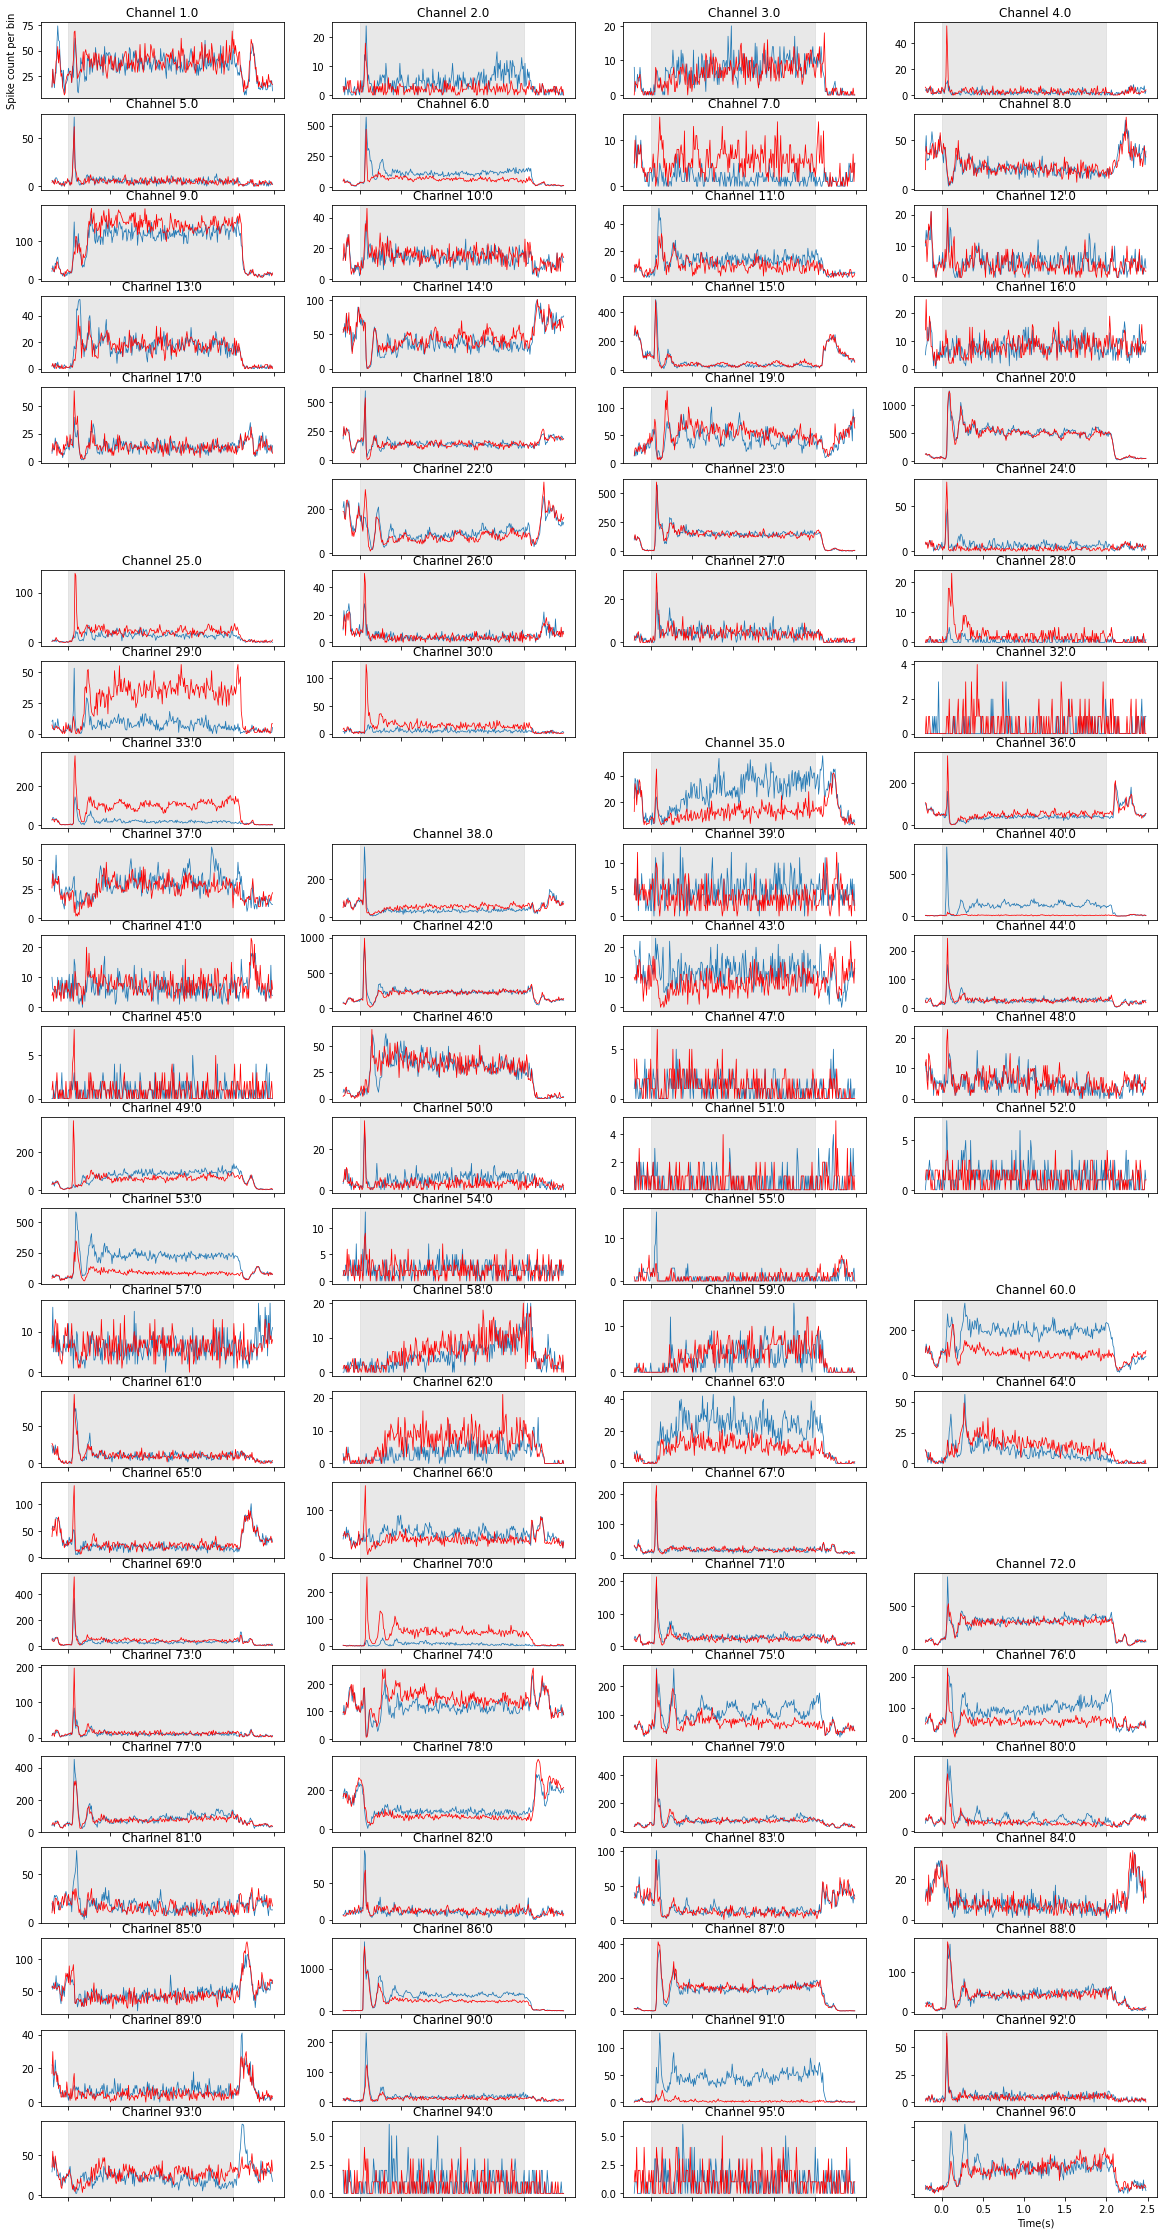

In [23]:
fig = plt.figure(figsize=[20, 40])

for i in channels:
    ax = fig.add_subplot(int(96/4), 4, int(i))
    zero = psth_labels.index([0., i])
    ax.plot(psth[zero][1][:-1], psth[zero][0], linewidth=.75)
    ninety = psth_labels.index([90., i])
    ax.plot(psth[ninety][1][:-1], psth[ninety][0], color='red', linewidth=.75)

    plt.axvspan(grating_on_time, grating_off_time, alpha=0.5, color='lightgray')

    ax.set_title('Channel ' + str(i))

    if i== 1:
        ax.set_ylabel('Spike count per bin')
        ax.set_xlabel('')
        ax.set_xticklabels('')
        
    elif i == max(channels):
        ax.set_xlabel('Time(s)')
        ax.set_ylabel('')
        ax.set_yticklabels('')
        
    else:
        ax.set_xlabel('')
        ax.set_xticklabels('')
        ax.set_ylabel('')
    
plt.show()    